## Leishmaniasis reported cases worldwide from 2005 to 2020

Disease type reported: cutaneous and visceral leishmaniasis (CL and VL respectively).

Period: 2005 - 2020. 

Area/Geography: Worldwide.  

Contents: 

[1. Visualize annual trends of reported local cases per region.](#section-1)

[2. Visualize annual trends of imported cases per region.](#section-2)

[3. For each year, find the country with maximum number of local reported cases.](#section-3)

[4. For each year, find the country with maximum number of imported cases.](#section-4)

[5. Generate a map for CL status of endemicity.](#section-5)

[6. Generate a map for VL status of endemicity.](#section-6)

[7. Summary.](#section-7)

[8. References.](#section-8)

In [26]:
# libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# load the tables

# cutaneous leishmaniasis (CL)
CL_local = pd.read_csv("../input/neglected-tropical-diseases-leishmaniasis/Number_of_cases_of_cutaneous_leishmaniasis_reported.csv")
CL_imported = pd.read_csv("../input/neglected-tropical-diseases-leishmaniasis/Number_of_imported_cases_of_cutaneous_leishmaniasis_reported.csv")
CL_endemicity = pd.read_csv("../input/neglected-tropical-diseases-leishmaniasis/Status_of_endemicity_of_cutaneous_leishmaniasis.csv")
# visceral leishmaniasis (VL)
VL_local = pd.read_csv("../input/neglected-tropical-diseases-leishmaniasis/Number_of_cases_of_visceral_leishmaniasis_reported.csv")
VL_imported = pd.read_csv("../input/neglected-tropical-diseases-leishmaniasis/Number_of_imported_cases_of_visceral_leishmaniasis_reported.csv")
VL_endemicity = pd.read_csv("../input/neglected-tropical-diseases-leishmaniasis/Status_of_endemicity_of_visceral_leishmaniasis.csv")

# show example table
print(CL_local.head(), "\n")

                                           Indicator ParentLocationCode  \
0  Number of cases of cutaneous leishmaniasis rep...                EMR   
1  Number of cases of cutaneous leishmaniasis rep...                EUR   
2  Number of cases of cutaneous leishmaniasis rep...                EUR   
3  Number of cases of cutaneous leishmaniasis rep...                EMR   
4  Number of cases of cutaneous leishmaniasis rep...               SEAR   

          ParentLocation SpatialDimValueCode  Location  Period  Value  
0  Eastern Mediterranean                 DJI  Djibouti    2020    0.0  
1                 Europe                 GEO   Georgia    2020    0.0  
2                 Europe                 GRC    Greece    2020    0.0  
3  Eastern Mediterranean                 OMN      Oman    2020    0.0  
4        South-East Asia                 THA  Thailand    2020    0.0   



<a id="section-1"></a>
### 1. Visualize annual trends of reported local cases per region

In [28]:
# group by region and year (ParentLocation, Period), CL local cases
# we could also use mean() instead of sum() to report the average number of cases instead
CL_local_summary = CL_local.groupby(["ParentLocation","Period"], as_index=False)["Value"].sum()
print(CL_local_summary.head(), "\n")

  ParentLocation  Period  Value
0         Africa    2005  932.0
1         Africa    2006  925.0
2         Africa    2007  288.0
3         Africa    2008   71.0
4         Africa    2009    0.0 



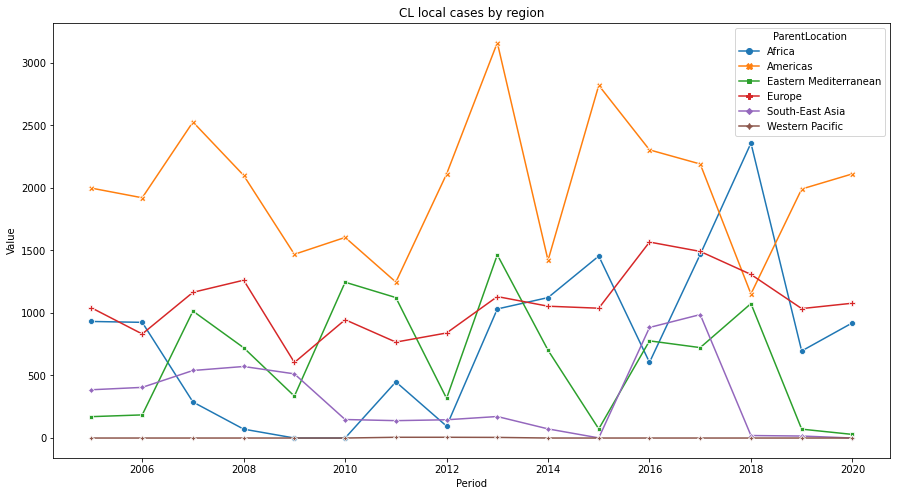

In [29]:
# visualize annual trend per region, CL local cases
plt.figure(figsize=(15,8))
sns.lineplot(
    data=CL_local_summary,
    x="Period", y="Value", hue="ParentLocation", style="ParentLocation",
    markers=True, dashes=False, legend="full"
)
plt.title("CL local cases by region")
plt.show()

In [30]:
# group by region and year (ParentLocation, Period), VL local cases
# we could also use mean() instead of sum() to report the average number of cases instead
VL_local_summary = VL_local.groupby(["ParentLocation","Period"], as_index=False)["Value"].sum()
print(VL_local_summary.head(), "\n")

  ParentLocation  Period   Value
0         Africa    2005   897.0
1         Africa    2006   473.0
2         Africa    2007  1073.0
3         Africa    2008  1228.0
4         Africa    2009   241.0 



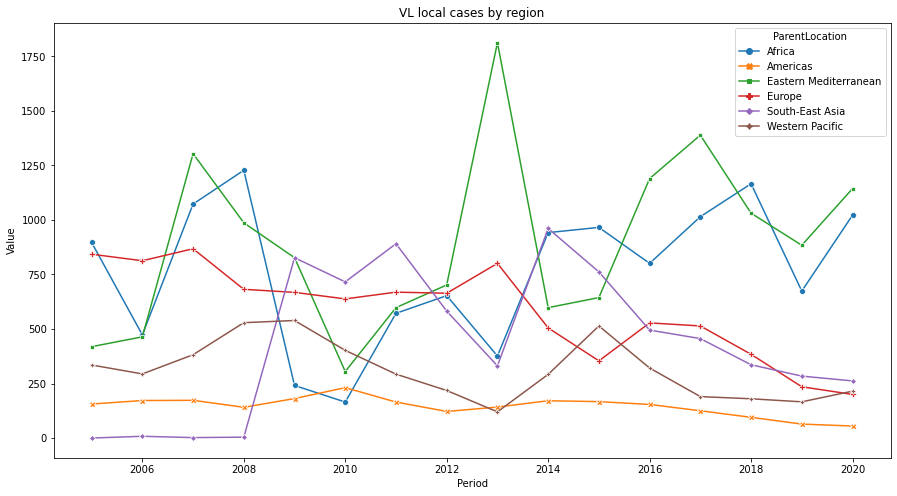

In [31]:
# visualize annual trend per region, VL local cases
plt.figure(figsize=(15,8))
sns.lineplot(
    data=VL_local_summary,
    x="Period", y="Value", hue="ParentLocation", style="ParentLocation",
    markers=True, dashes=False, legend="full"
)
plt.title("VL local cases by region")
plt.show()

<a id="section-2"></a>
### 2. Visualize annual trends of imported cases per region

In [32]:
# group by region and year (ParentLocation, Period), CL imported cases
# we could also use mean() instead of sum() to report the average number of cases instead
CL_imported_summary = CL_imported.groupby(["ParentLocation","Period"], as_index=False)["Value"].sum()
print(CL_imported_summary.head(), "\n")

  ParentLocation  Period  Value
0         Africa    2013    0.0
1         Africa    2014    0.0
2         Africa    2015    0.0
3         Africa    2016    0.0
4         Africa    2017    0.0 



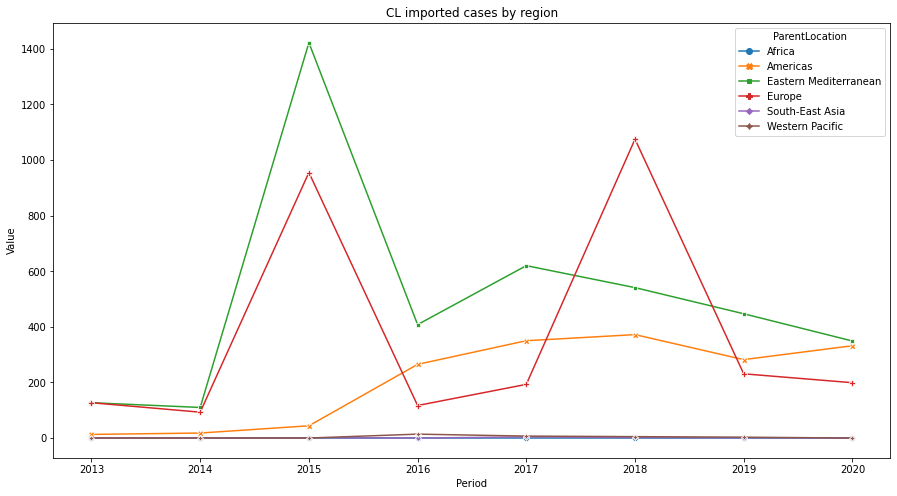

In [33]:
# visualize annual trend per region, CL imported cases
plt.figure(figsize=(15,8))
sns.lineplot(
    data=CL_imported_summary,
    x="Period", y="Value", hue="ParentLocation", style="ParentLocation",
    markers=True, dashes=False, legend="full"
)
plt.title("CL imported cases by region")
plt.show()

In [34]:
# group by region and year (ParentLocation, Period), VL imported cases
# we could also use mean() instead of sum() to report the average number of cases instead
VL_imported_summary = VL_imported.groupby(["ParentLocation","Period"], as_index=False)["Value"].sum()
print(VL_imported_summary.head(), "\n")

  ParentLocation  Period  Value
0         Africa    2013    0.0
1         Africa    2014  219.0
2         Africa    2015  166.0
3         Africa    2016   67.0
4         Africa    2017  114.0 



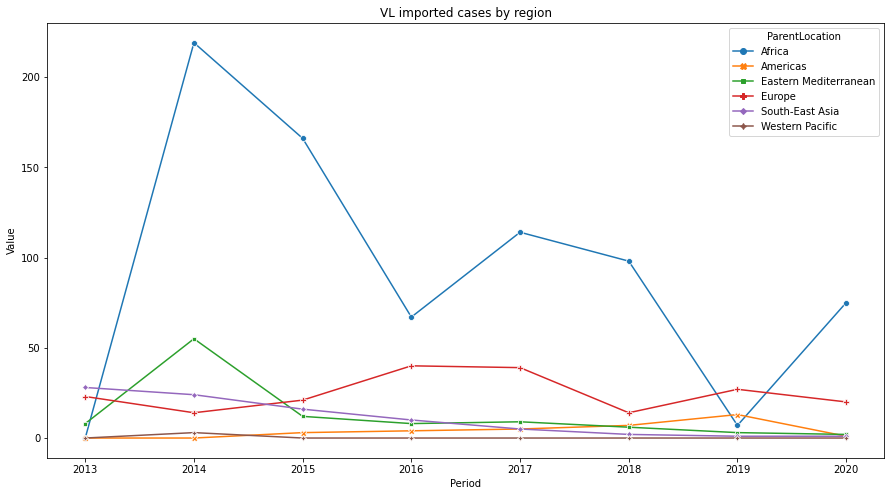

In [35]:
# visualize annual trend per region, CL imported cases
plt.figure(figsize=(15,8))
sns.lineplot(
    data=VL_imported_summary,
    x="Period", y="Value", hue="ParentLocation", style="ParentLocation",
    markers=True, dashes=False, legend="full"
)
plt.title("VL imported cases by region")
plt.show()

<a id="section-3"></a>
### 3. For each year, find the country with maximum number of local reported cases

In [36]:
# group by  year (Period) to find the max. Value and country, CL local cases
CL_local_max_per_year = CL_local.groupby(["Period"], as_index=False)["Value"].max()
countries_maxvalues_CL1 = CL_local[ (CL_local["Period"].isin(CL_local_max_per_year["Period"].tolist())) & (CL_local["Value"].isin(CL_local_max_per_year["Value"].tolist())) ].sort_values(by="Period")
countries_maxvalues_CL1 = countries_maxvalues_CL1[ ["Period", "Location", "Value"] ]
countries_maxvalues_CL1.rename(columns = {'Period':'Year', 'Location':'Country', 'Value':'Max_Value'}, inplace = True)
print(countries_maxvalues_CL1, "\n")

      Year       Country  Max_Value
1403  2005        Mexico      861.0
1402  2005  Burkina Faso      827.0
1311  2006  Burkina Faso      827.0
1224  2007        Israel      904.0
1130  2008        Israel      884.0
1030  2009     Guatemala      519.0
946   2010         Sudan      752.0
866   2011         Egypt      864.0
771   2012      Suriname      594.0
688   2013        Mexico      970.0
599   2014  Burkina Faso      741.0
516   2015        Panama      930.0
428   2016     Sri Lanka      883.0
338   2017     Sri Lanka      980.0
246   2018  Saudi Arabia      921.0
149   2019        Panama      920.0
54    2020        Panama      938.0 



In [37]:
# group by  year (Period) to find the max. Value and country, VL local cases
VL_local_max_per_year = VL_local.groupby(["Period"], as_index=False)["Value"].max()
countries_maxvalues_VL1 = VL_local[ (VL_local["Period"].isin(VL_local_max_per_year["Period"].tolist())) & (VL_local["Value"].isin(VL_local_max_per_year["Value"].tolist())) ].sort_values(by="Period")
countries_maxvalues_VL1 = countries_maxvalues_VL1[ ["Period", "Location", "Value"] ]
countries_maxvalues_VL1.rename(columns = {'Period':'Year', 'Location':'Country', 'Value':'Max_Value'}, inplace = True)
print(countries_maxvalues_VL1, "\n")

      Year      Country  Max_Value
1287  2005       Uganda      504.0
1195  2006        China      294.0
1129  2007         Iraq      836.0
1045  2008      Somalia      583.0
960   2009        Nepal      824.0
871   2010        Nepal      708.0
806   2011        Nepal      886.0
716   2012        Nepal      575.0
644   2013      Somalia      936.0
633   2013         Iraq      575.0
556   2014        Kenya      880.0
478   2015        Kenya      894.0
466   2015        China      514.0
392   2016      Somalia      780.0
313   2017        Kenya      950.0
227   2018        Kenya      590.0
136   2019      Eritrea      514.0
129   2019      Somalia      294.0
53    2020  South Sudan      827.0 



<a id="section-4"></a>
### 4. For each year, find the country with maximum number of imported cases

In [38]:
# group by  year (Period) to find the max. Value and country, CL imported cases
CL_imported_max_per_year = CL_imported.groupby(["Period"], as_index=False)["Value"].max()
countries_maxvalues_CL2 = CL_imported[ (CL_imported["Period"].isin(CL_imported_max_per_year["Period"].tolist())) & (CL_imported["Value"].isin(CL_imported_max_per_year["Value"].tolist())) ].sort_values(by="Period")
countries_maxvalues_CL2 = countries_maxvalues_CL2[ ["Period", "Location", "Value"] ]
countries_maxvalues_CL2.rename(columns = {'Period':'Year', 'Location':'Country', 'Value':'Max_Value'}, inplace = True)
print(countries_maxvalues_CL2, "\n")

     Year                     Country  Max_Value
793  2013                      Jordan      103.0
704  2014                      Jordan       80.0
629  2015  Iran (Islamic Republic of)      908.0
536  2016                      Brazil      222.0
433  2017                      Brazil      249.0
356  2018                      Turkey      838.0
248  2019                     Lebanon      318.0
48   2020                      Brazil      291.0 



In [39]:
# group by  year (Period) to find the max. Value and country, CL imported cases
VL_imported_max_per_year = VL_imported.groupby(["Period"], as_index=False)["Value"].max()
countries_maxvalues_VL2 = VL_imported[ (VL_imported["Period"].isin(VL_imported_max_per_year["Period"].tolist())) & (VL_imported["Value"].isin(VL_imported_max_per_year["Value"].tolist())) ].sort_values(by="Period")
countries_maxvalues_VL2 = countries_maxvalues_VL2[ ["Period", "Location", "Value"] ]
countries_maxvalues_VL2.rename(columns = {'Period':'Year', 'Location':'Country', 'Value':'Max_Value'}, inplace = True)
print(countries_maxvalues_VL2, "\n")

     Year                     Country  Max_Value
844  2013                       Nepal       28.0
736  2014                    Ethiopia      116.0
741  2014  Iran (Islamic Republic of)       28.0
658  2015                      Uganda       93.0
555  2016                      Turkey       14.0
562  2016                      Uganda       58.0
458  2017                      Uganda       80.0
365  2018                      Uganda       60.0
249  2019                      France       14.0
57   2020                      Uganda       68.0 



<a id="section-5"></a>
## 5. Generate a map for CL status of endemicity

In [40]:
# load world map from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world.head(), world.shape, "\n" )

     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   (177, 6) 



In [41]:
# change iso_a3 column name in order to match dataset column names
world.rename(columns={'iso_a3': 'SpatialDimValueCode'}, inplace=True)
print(world.head(), "\n" )

     pop_est      continent                      name SpatialDimValueCode  \
0     920938        Oceania                      Fiji                 FJI   
1   53950935         Africa                  Tanzania                 TZA   
2     603253         Africa                 W. Sahara                 ESH   
3   35623680  North America                    Canada                 CAN   
4  326625791  North America  United States of America                 USA   

   gdp_md_est                                           geometry  
0      8374.0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    150600.0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2       906.5  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3   1674000.0  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   



In [42]:
# merge CL endemicty table with world table
CL_endemicity_updated = CL_endemicity.merge(world,on='SpatialDimValueCode')
CL_endemicity_updated = GeoDataFrame(CL_endemicity_updated)
print(CL_endemicity_updated.head(), CL_endemicity_updated.shape, "\n")

                                         Indicator ParentLocationCode  \
0  Status of endemicity of cutaneous leishmaniasis                EMR   
1  Status of endemicity of cutaneous leishmaniasis                EUR   
2  Status of endemicity of cutaneous leishmaniasis                AFR   
3  Status of endemicity of cutaneous leishmaniasis                AMR   
4  Status of endemicity of cutaneous leishmaniasis                EUR   

          ParentLocation SpatialDimValueCode     Location  Period    Value  \
0  Eastern Mediterranean                 AFG  Afghanistan    2020  Endemic   
1                 Europe                 ALB      Albania    2020  Endemic   
2                 Africa                 DZA      Algeria    2020  Endemic   
3               Americas                 ARG    Argentina    2020  Endemic   
4                 Europe                 ARM      Armenia    2020  Endemic   

    pop_est      continent         name  gdp_md_est  \
0  34124811           Asia  Afghanist

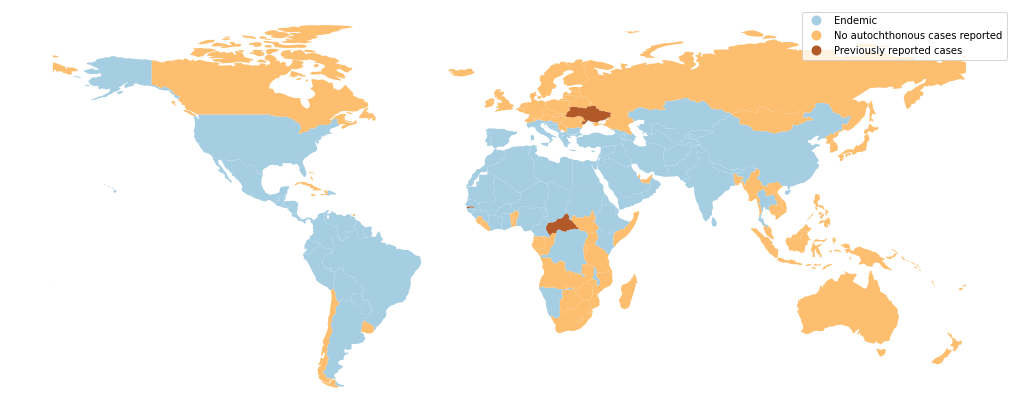

In [43]:
# plot endemicity map, CL
plt.rcParams["figure.figsize"] = (18,9)
ax=CL_endemicity_updated.plot("Value", categorical=True, cmap="Paired", legend=True)
ax.set_axis_off()
plt.show()


In [44]:
# CL endemicity counts as shown in map
CL_endemicity_updated["Value"].value_counts()

Endemic                            84
No autochthonous cases reported    76
Previously reported cases           3
Name: Value, dtype: int64

In [45]:
# note that because not all countries in the dataset match 
# the country codes in the world map, row numbers differ: 
print(CL_endemicity.shape, CL_endemicity_updated.shape, "\n")

(194, 7) (163, 12) 



<a id="section-6"></a>
### 6. Generate a map for VL status of endemicity

In [46]:
# merge VL endemicty table with world table (use the same world map above)
VL_endemicity_updated = VL_endemicity.merge(world,on='SpatialDimValueCode')
VL_endemicity_updated = GeoDataFrame(VL_endemicity_updated)
print(VL_endemicity_updated.head(), VL_endemicity_updated.shape, "\n")

                                        Indicator ParentLocationCode  \
0  Status of endemicity of visceral leishmaniasis                EMR   
1  Status of endemicity of visceral leishmaniasis                EUR   
2  Status of endemicity of visceral leishmaniasis                AFR   
3  Status of endemicity of visceral leishmaniasis                AMR   
4  Status of endemicity of visceral leishmaniasis                EUR   

          ParentLocation SpatialDimValueCode     Location  Period    Value  \
0  Eastern Mediterranean                 AFG  Afghanistan    2020  Endemic   
1                 Europe                 ALB      Albania    2020  Endemic   
2                 Africa                 DZA      Algeria    2020  Endemic   
3               Americas                 ARG    Argentina    2020  Endemic   
4                 Europe                 ARM      Armenia    2020  Endemic   

    pop_est      continent         name  gdp_md_est  \
0  34124811           Asia  Afghanistan    

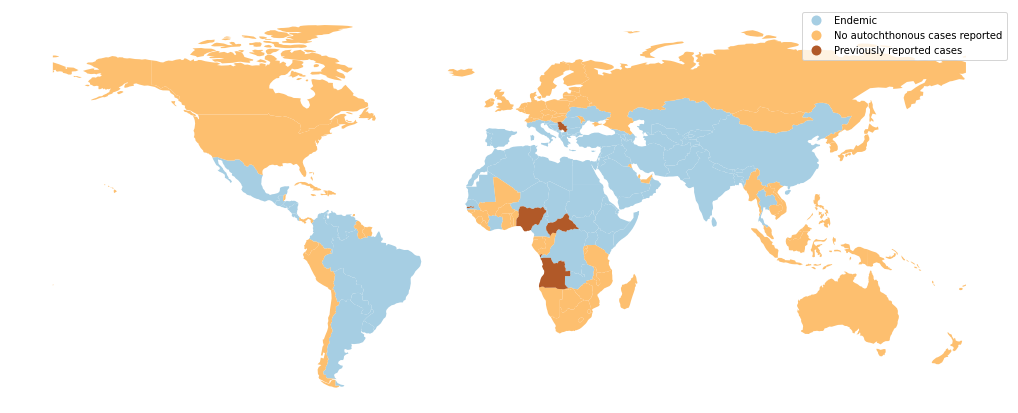

In [47]:
# plot endemicity map, VL
plt.rcParams["figure.figsize"] = (18,9)
ax=VL_endemicity_updated.plot("Value", categorical=True, cmap="Paired", legend=True)
ax.set_axis_off()
plt.show()


In [48]:
# VL endemicity counts as shown in map
VL_endemicity_updated["Value"].value_counts()

No autochthonous cases reported    83
Endemic                            75
Previously reported cases           5
Name: Value, dtype: int64

In [49]:
# note that because not all countries in the dataset match 
# the country codes in the world map, row numbers differ: 
print(VL_endemicity.shape, VL_endemicity_updated.shape, "\n")

(194, 7) (163, 12) 



<a id="section-7"></a>
### 7. Summary

1. In this notebook we only provided basic examples on how to use the dataset, but any new ideas or suggestions are welcome. 
2. You can use [geopandas](https://geopandas.org/) to summarize the data in a world map.
3. For map visualization you could also use [geoplot](https://residentmario.github.io/geoplot/index.html) or [folium](https://python-visualization.github.io/folium/).

<a id="section-8"></a>
### 8. References

1. [Neglected tropical diseases: Leishmaniasis. The Global Health Observatory](https://www.who.int/data/gho/data/themes/topics/gho-ntd-leishmaniasis).
2. [Data repository: Leishmaniasis. The Global Health Observatory (WHO)](https://www.who.int/data/gho/data/themes/topics/indicator-groups/indicator-group-details/GHO/leishmaniasis).
3. [Dataset banner image: *Leishmania tropica*, Wikipedia](https://en.wikipedia.org/wiki/Leishmania#/media/File:Leishmania_tropica_7.jpg).
